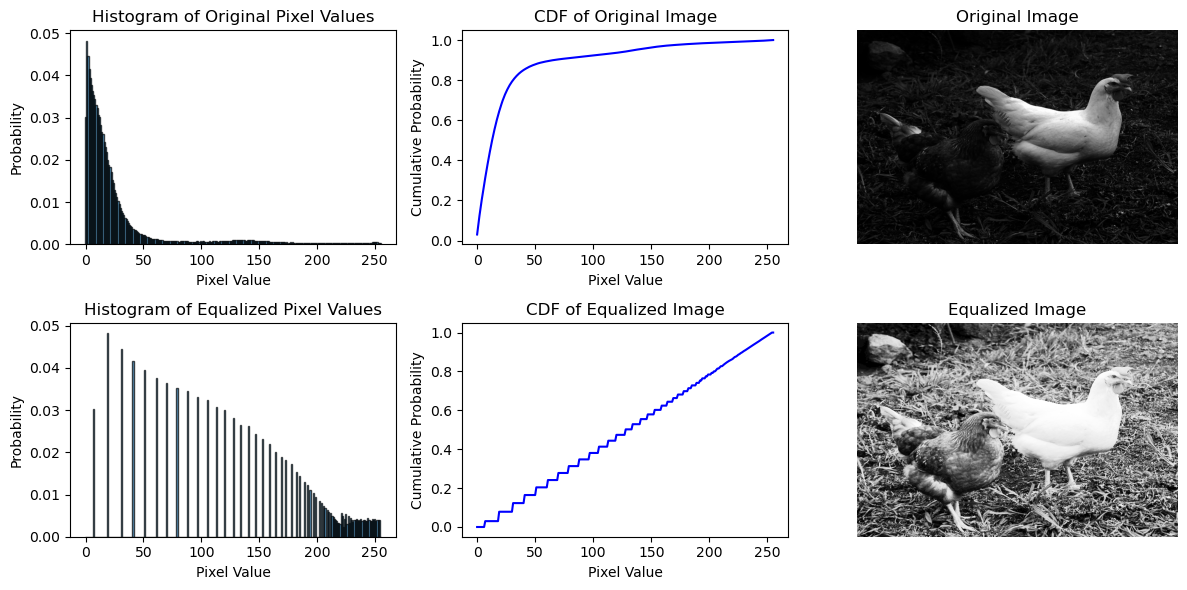

Pixel Value Distributions and Transformed Values:
r_0 = 0.0302, CDF = 0.0302, s_0 = 7.00
r_1 = 0.0483, CDF = 0.0784, s_1 = 19.00
r_2 = 0.0445, CDF = 0.1229, s_2 = 31.00
r_3 = 0.0415, CDF = 0.1645, s_3 = 41.00
r_4 = 0.0394, CDF = 0.2039, s_4 = 51.00
r_5 = 0.0376, CDF = 0.2415, s_5 = 61.00
r_6 = 0.0363, CDF = 0.2778, s_6 = 70.00
r_7 = 0.0353, CDF = 0.3132, s_7 = 79.00
r_8 = 0.0345, CDF = 0.3477, s_8 = 88.00
r_9 = 0.0331, CDF = 0.3808, s_9 = 97.00
r_10 = 0.0324, CDF = 0.4132, s_10 = 105.00
r_11 = 0.0306, CDF = 0.4438, s_11 = 113.00
r_12 = 0.0301, CDF = 0.4739, s_12 = 120.00
r_13 = 0.0282, CDF = 0.5022, s_13 = 128.00
r_14 = 0.0266, CDF = 0.5287, s_14 = 134.00
r_15 = 0.0262, CDF = 0.5549, s_15 = 141.00
r_16 = 0.0242, CDF = 0.5792, s_16 = 147.00
r_17 = 0.0231, CDF = 0.6023, s_17 = 153.00
r_18 = 0.0219, CDF = 0.6242, s_18 = 159.00
r_19 = 0.0201, CDF = 0.6442, s_19 = 164.00
r_20 = 0.0188, CDF = 0.6631, s_20 = 169.00
r_21 = 0.0182, CDF = 0.6813, s_21 = 173.00
r_22 = 0.0172, CDF = 0.6985, s_22 =

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 讀取圖片並轉換為灰度圖
image_path = 'chickens.png'  # 替換成你的圖片路徑
image = Image.open(image_path).convert('L')

# 將圖片轉換為NumPy數組
image_array = np.array(image)

# 計算直方圖及其概率分佈
histogram, bin_edges = np.histogram(image_array, bins=256, range=(0, 256), density=True)

# 計算累積分佈函數 (CDF)
cdf = np.cumsum(histogram)

# 定義轉換函數 T(r) = 255 * CDF(r)
def transformation_function(cdf, scale_factor=255):
    return scale_factor * cdf

# 計算所有像素值的轉換結果
s_values = transformation_function(cdf).astype(np.uint8)

# 應用轉換函數到原始圖像
equalized_image_array = s_values[image_array]

# 計算均衡化後圖像的直方圖及其概率分佈
equalized_histogram, equalized_bin_edges = np.histogram(equalized_image_array, bins=256, range=(0, 256), density=True)

# 計算均衡化後的CDF
equalized_cdf = np.cumsum(equalized_histogram)

# 轉換回PIL圖像
equalized_image = Image.fromarray(equalized_image_array)

# 繪製原始直方圖和CDF以及均衡化後的直方圖和CDF
plt.figure(figsize=(12, 6))

# 原始直方圖
plt.subplot(2, 3, 1)
plt.bar(bin_edges[:-1], histogram, width=1, edgecolor='black', alpha=0.7)
plt.title('Histogram of Original Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Probability')

# 原始CDF
plt.subplot(2, 3, 2)
plt.plot(bin_edges[:-1], cdf, color='blue')
plt.title('CDF of Original Image')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Probability')

# 原始圖像
plt.subplot(2, 3, 3)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# 均衡化後的直方圖
plt.subplot(2, 3, 4)
plt.bar(equalized_bin_edges[:-1], equalized_histogram, width=1, edgecolor='black', alpha=0.7)
plt.title('Histogram of Equalized Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Probability')

# 均衡化後的CDF
plt.subplot(2, 3, 5)
plt.plot(equalized_bin_edges[:-1], equalized_cdf, color='blue')
plt.title('CDF of Equalized Image')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Probability')

# 均衡化後的圖像
plt.subplot(2, 3, 6)
plt.imshow(equalized_image_array, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# 顯示每個像素值的分佈概率和轉換後的結果
print("Pixel Value Distributions and Transformed Values:")
for i in range(256):
    print(f"r_{i} = {histogram[i]:.4f}, CDF = {cdf[i]:.4f}, s_{i} = {s_values[i]:.2f}")


In [13]:
import numpy as np

# Define the output file path
output_file_path = 's_values.txt'

# Write s_values to the file
with open(output_file_path, 'w') as file:
    for i, s_value in enumerate(s_values):
        file.write(f"s_{i} = {s_value}\n")

